In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

# In order to download to drive we mount our google drives to colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
data = pd.read_excel("/content/drive/My Drive/EC 438 experiment/Group Experiment/EC 438 deney (Yanıtlar).xlsx").iloc[13: , :]

data.A = data.A.apply(lambda x: float(str(x).replace(",", ".")))
data.B = data.B.apply(lambda x: float(str(x).replace(",", ".")))
data.C = data.C.apply(lambda x: float(str(x).replace(",", ".")))
data.D = data.D.apply(lambda x: float(str(x).replace(",", ".")))
data.E = data.E.apply(lambda x: float(str(x).replace(",", ".")))

data.A_tax = data.A_tax.apply(lambda x: float(str(x).replace(",", ".")))
data.B_tax = data.B_tax.apply(lambda x: float(str(x).replace(",", ".")))
data.C_tax = data.C_tax.apply(lambda x: float(str(x).replace(",", ".")))
data.D_tax = data.D_tax.apply(lambda x: float(str(x).replace(",", ".")))
data.E_tax = data.E_tax.apply(lambda x: float(str(x).replace(",", ".")))

data["A_ratio"] = data.A / (data.A_tax/1.3)
data["B_ratio"] = data.B / (data.B_tax/1.3)
data["C_ratio"] = data.C / (data.C_tax/1.3)
data["D_ratio"] = data.D / (data.D_tax/1.3)
data["E_ratio"] = data.E / (data.E_tax/1.3)

data["constant"] = 1

In [193]:
print(data["A_ratio"].mean())
print(data["B_ratio"].mean())
print(data["C_ratio"].mean())
print(data["D_ratio"].mean())
print(data["E_ratio"].mean())


1.0061361711449364
1.0096829994607794
1.0012946945973513
0.9976837368188629
0.9946191155602617


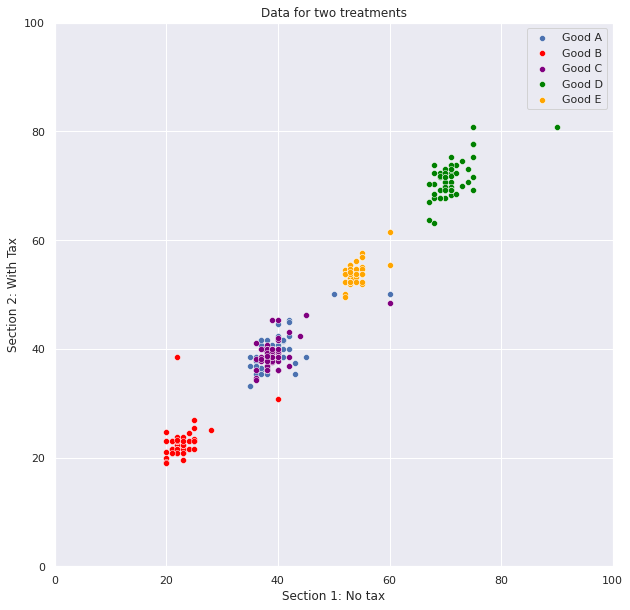

In [180]:
sns.set(rc={'figure.figsize':(10,10)})
axs = sns.scatterplot(x=data.A, y=(data.A_tax/1.3))
axs = sns.scatterplot(x=data.B, y=(data.B_tax/1.3), color = "red", ax=axs)
axs = sns.scatterplot(x=data.C, y=(data.C_tax/1.3), color = "purple", ax=axs)
axs = sns.scatterplot(x=data.D, y=(data.D_tax/1.3), color = "green", ax=axs)
axs = sns.scatterplot(x=data.E, y=(data.E_tax/1.3), color = "orange", ax=axs)
#axs = sns.lineplot([0, 100], [0, 100], linewidth=1, ax=axs)

axs.set(ylim=(0, 100), xlim=(0,100),xlabel="Section 1: No tax", ylabel="Section 2: With Tax", title="Data for two treatments" )
axs.legend(["Good A", "Good B","Good C","Good D","Good E" ])

In [192]:
data.A_ratio.mean()

1.0061361711449364

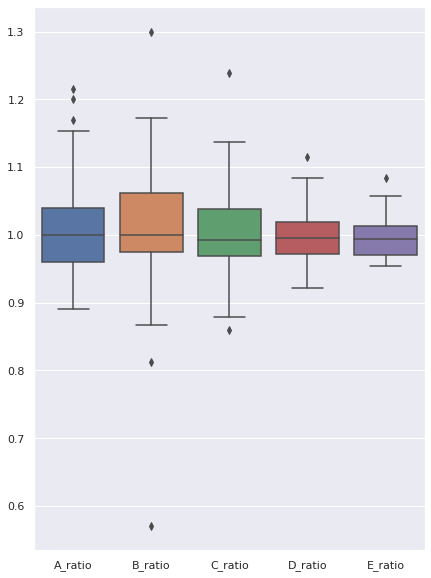

In [194]:
sns.set(rc={'figure.figsize':(7,10)})
sns.boxplot(data=data[["A_ratio", "B_ratio", "C_ratio", "D_ratio", "E_ratio"]])

In [ ]:
sns.set(rc={'figure.figsize':(12,7)})
sns.boxplot(x=["A", "B", "C"] , y= "Contribution", hue = "treatment", data = all_data).set_title("Fig 2: Boxplots of Contributions")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

[(48.0, 63.0), (48.0, 63.0), Text(0.5, 1.0, 'Question E data')]

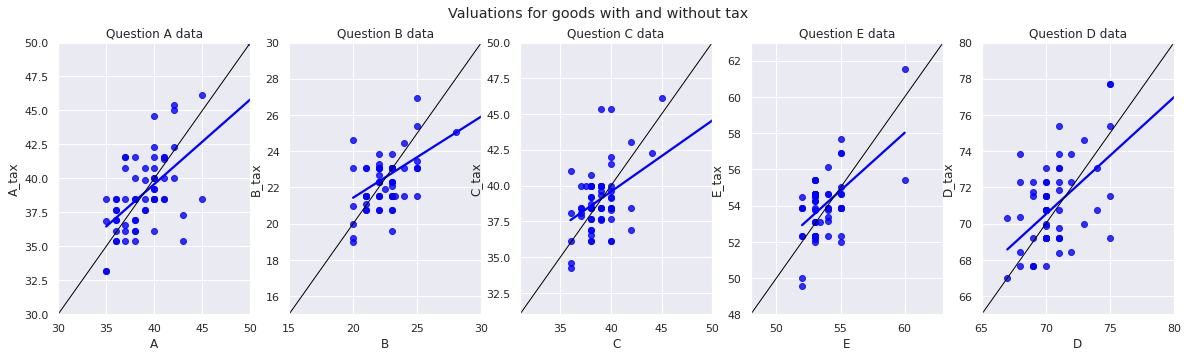

In [141]:
#Set the figure size: 
sns.set(rc={'figure.figsize':(20,5)})

#Divide the figure:
fig, axs = plt.subplots(1,5)
fig.suptitle('Valuations for goods with and without tax')

#Plot each variable with frgn_deposit_share
sns.regplot(x=data.A, y=(data.A_tax/1.3),color="blue", ci=None, ax=axs[0])
#sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].A, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].A_tax/1.3), color="red",ci=None, ax=axs[0])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[0])
axs[0].set(ylim=(30, 50), xlim=(30,50), title="Question A data" )

sns.regplot(x=data.B, y=(data.B_tax/1.3),color="blue", ci=None, ax=axs[1])
#sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].B, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].B_tax/1.3), color="red",ci=None,  ax=axs[1])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[1])
axs[1].set(ylim=(15, 30), xlim=(15,30), title="Question B data" )

sns.regplot(x=data.C, y=(data.C_tax/1.3),color="blue", ci=None, ax=axs[2])
#sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].C, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].C_tax/1.3), color="red",ci=None,  ax=axs[2])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[2])
axs[2].set(ylim=(31, 50), xlim=(31,50), title="Question C data" )

sns.regplot(x=data.D, y=(data.D_tax/1.3),color="blue", ci=None, ax=axs[4])
#sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].D, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].D_tax/1.3), color="red",ci=None,  ax=axs[3])
sns.lineplot([0, 100], [0, 100], linewidth=1, color = "black", ax=axs[4])
axs[4].set(ylim=(65, 80), xlim=(65,80), title="Question D data" )

sns.regplot(x=data.E, y=(data.E_tax/1.3),color="blue", ci=None, ax=axs[3])
#sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].E, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].E_tax/1.3), color="red",ci=None,  ax=axs[4])
sns.lineplot([0, 100], [0, 100], linewidth=1, color = "black", ax=axs[3])
axs[3].set(ylim=(48, 63), xlim=(48,63), title="Question E data" )


In [182]:
coefs = pd.DataFrame()


coefs.loc["A", "coef"] = sm.OLS(exog=data[["A","constant" ]], endog=(data.A_tax/1.3)) .fit().params.A
coefs.loc["A", "std error"] = sm.OLS(exog=data[["A","constant" ]], endog=(data.A_tax/1.3)) .fit().bse.A
coefs.loc["A", "p_value"] = sm.OLS(exog=data[["A","constant" ]], endog=(data.A_tax/1.3)) .fit().pvalues.A

coefs.loc["B", "coef"] = sm.OLS(exog=data[["B","constant" ]], endog=(data.B_tax/1.3)) .fit().params.B
coefs.loc["B", "std error"] = sm.OLS(exog=data[["B","constant" ]], endog=(data.B_tax/1.3)) .fit().bse.B
coefs.loc["B", "p_value"] = sm.OLS(exog=data[["B","constant" ]], endog=(data.B_tax/1.3)) .fit().pvalues.B

coefs.loc["C", "coef"] = sm.OLS(exog=data[["C","constant" ]], endog=(data.C_tax/1.3)) .fit().params.C
coefs.loc["C", "std error"] = sm.OLS(exog=data[["C","constant" ]], endog=(data.C_tax/1.3)) .fit().bse.C
coefs.loc["C", "p_value"] = sm.OLS(exog=data[["C","constant" ]], endog=(data.C_tax/1.3)) .fit().pvalues.C

coefs.loc["D", "coef"] = sm.OLS(exog=data[["D","constant" ]], endog=(data.D_tax/1.3)) .fit().params.D
coefs.loc["D", "std error"] = sm.OLS(exog=data[["D","constant" ]], endog=(data.D_tax/1.3)) .fit().bse.D
coefs.loc["D", "p_value"] = sm.OLS(exog=data[["D","constant" ]], endog=(data.D_tax/1.3)) .fit().pvalues.D

coefs.loc["E", "coef"] = sm.OLS(exog=data[["E","constant" ]], endog=(data.E_tax/1.3)) .fit().params.E
coefs.loc["E", "std error"] = sm.OLS(exog=data[["E","constant" ]], endog=(data.E_tax/1.3)) .fit().bse.E
coefs.loc["E", "p_value"] = sm.OLS(exog=data[["E","constant" ]], endog=(data.E_tax/1.3)) .fit().pvalues.E

coefs["range given in the question"] = ["35 - 45 TL" , "20 - 25 TL", "36 - 42 TL", "67 - 75 TL", "52 - 55 TL"]
#coefs = coefs.loc[["B", "A", "C", "E", "D" ]]

coefs

,coef,std error,p_value,range given in the question
A,0.623955,0.078352,5.083501e-11,35 - 45 TL
B,0.448647,0.114764,2.349564e-04,20 - 25 TL
C,0.497493,0.080521,5.847056e-08,36 - 42 TL
D,0.646707,0.097381,9.556882e-09,67 - 75 TL
E,0.637398,0.124557,3.331270e-06,52 - 55 TL


In [183]:
coefs[["range given in the question", "coef"]]

,range given in the question,coef
A,35 - 45 TL,0.623955
B,20 - 25 TL,0.448647
C,36 - 42 TL,0.497493
D,67 - 75 TL,0.646707
E,52 - 55 TL,0.637398


In [167]:
sm.OLS(exog=data[["E","constant" ]], endog=(data.E_tax/1.3)) .fit().pvalues.E

3.33127029431017e-06

# Financial Literacy

In [104]:
sm.OLS(exog=data[["A","constant" ]], endog=(data.A_tax/1.3)) .fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  A_tax   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     63.42
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           5.08e-11
Time:                        12:46:58   Log-Likelihood:                -142.66
No. Observations:                  63   AIC:                             289.3
Df Residuals:                      61   BIC:                             293.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.6240      0.078      7.963      0.000       0.467       0.781
constant      14.6235      3.099      4.719      0.000       8.427      20.820
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.172
Skew:                           0.067   Prob(JB):                        0.918
Kurtosis:                       2.782   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] = data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

[(48.0, 63.0), (48.0, 63.0), Text(0.5, 1.0, 'Question E data')]

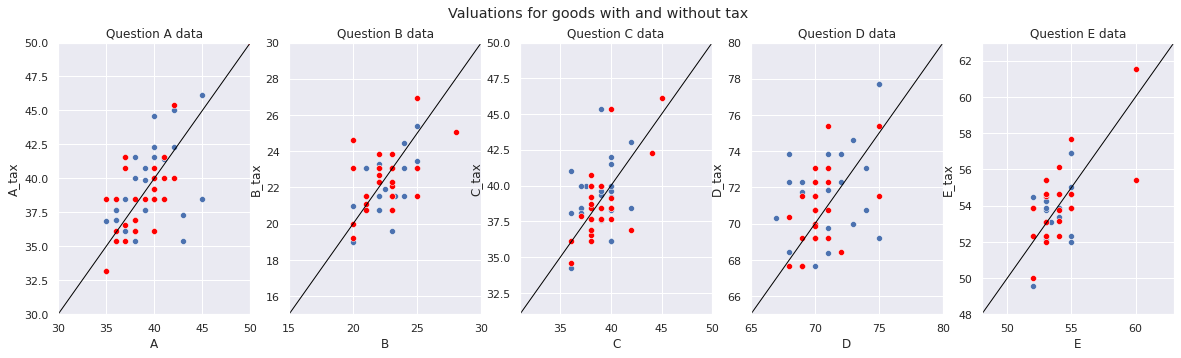

In [63]:
#Set the figure size: 
sns.set(rc={'figure.figsize':(20,5)})

#Divide the figure:
fig, axs = plt.subplots(1,5)
fig.suptitle('Valuations for goods with and without tax')

#Plot each variable with frgn_deposit_share
sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].A, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].A_tax/1.3), ax=axs[0])
sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].A, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].A_tax/1.3), color="red", ax=axs[0])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[0])
axs[0].set(ylim=(30, 50), xlim=(30,50), title="Question A data" )

sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].B, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].B_tax/1.3), ax=axs[1])
sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].B, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].B_tax/1.3), color="red", ax=axs[1])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[1])
axs[1].set(ylim=(15, 30), xlim=(15,30), title="Question B data" )

sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].C, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].C_tax/1.3), ax=axs[2])
sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].C, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].C_tax/1.3), color="red", ax=axs[2])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[2])
axs[2].set(ylim=(31, 50), xlim=(31,50), title="Question C data" )

sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].D, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].D_tax/1.3), ax=axs[3])
sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].D, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].D_tax/1.3), color="red", ax=axs[3])
sns.lineplot([0, 100], [0, 100], linewidth=1, color = "black", ax=axs[3])
axs[3].set(ylim=(65, 80), xlim=(65,80), title="Question D data" )

sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].E, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].E_tax/1.3), ax=axs[4])
sns.scatterplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].E, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].E_tax/1.3), color="red", ax=axs[4])
sns.lineplot([0, 100], [0, 100], linewidth=1, color = "black", ax=axs[4])
axs[4].set(ylim=(48, 63), xlim=(48,63), title="Question E data" )



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

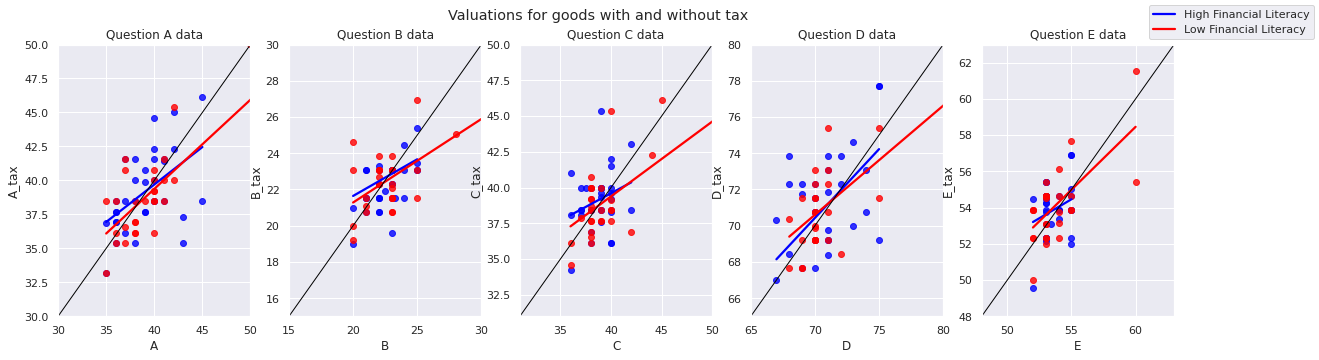

In [144]:
#Set the figure size: 
sns.set(rc={'figure.figsize':(20,5)})

#Divide the figure:
fig, axs = plt.subplots(1,5)
fig.suptitle('Valuations for goods with and without tax')

#Plot each variable with frgn_deposit_share
sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].A, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].A_tax/1.3),color="blue", ci=None, ax=axs[0])
sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].A, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].A_tax/1.3), color="red",ci=None, ax=axs[0])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[0])
axs[0].set(ylim=(30, 50), xlim=(30,50), title="Question A data" )

sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].B, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].B_tax/1.3),color="blue", ci=None, ax=axs[1])
sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].B, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].B_tax/1.3), color="red",ci=None,  ax=axs[1])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[1])
axs[1].set(ylim=(15, 30), xlim=(15,30), title="Question B data" )

sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].C, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].C_tax/1.3),color="blue", ci=None, ax=axs[2])
sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].C, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].C_tax/1.3), color="red",ci=None,  ax=axs[2])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[2])
axs[2].set(ylim=(31, 50), xlim=(31,50), title="Question C data" )

sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].D, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].D_tax/1.3),color="blue", ci=None, ax=axs[3])
sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].D, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].D_tax/1.3), color="red",ci=None,  ax=axs[3])
sns.lineplot([0, 100], [0, 100], linewidth=1, color = "black", ax=axs[3])
axs[3].set(ylim=(65, 80), xlim=(65,80), title="Question D data" )

sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5].E, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]> 5].E_tax/1.3),color="blue", ci=None, ax=axs[4])
sns.regplot(x=data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ] <= 5].E, y=(data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız," ]<= 5].E_tax/1.3), color="red",ci=None,  ax=axs[4])
sns.lineplot([0, 100], [0, 100], linewidth=1, color = "black", ax=axs[4])
axs[4].set(ylim=(48, 63), xlim=(48,63), title="Question E data" )

fig.legend(["High Financial Literacy", "Low Financial Literacy"])


# High real return (optimistic vs pessimistic)

In [177]:
data["re_ge"] = 1
data.loc[data["Yıllık reel getiri beklentinizi yüzde olarak belirtiniz,"] > 15, "re_ge"] = 0

In [178]:
data.re_ge.value_counts()

0    40
1    23
Name: re_ge, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

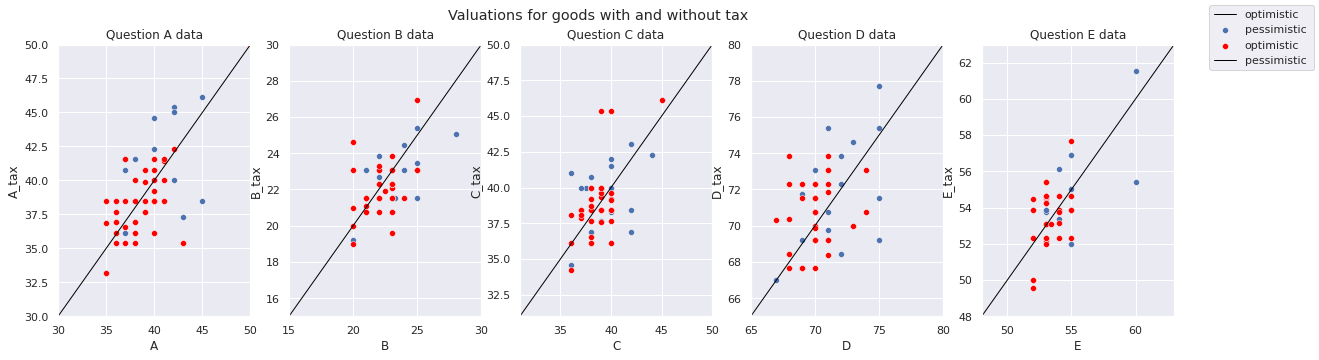

In [195]:
#Set the figure size: 
sns.set(rc={'figure.figsize':(20,5)})

#Divide the figure:
fig, axs = plt.subplots(1,5)
fig.suptitle('Valuations for goods with and without tax')

#Plot each variable with frgn_deposit_share
sns.scatterplot(x=data[data["re_ge"] > 0].A, y=(data[data["re_ge" ]> 0].A_tax/1.3), ax=axs[0])
sns.scatterplot(x=data[data["re_ge" ] <= 0].A, y=(data[data["re_ge" ]<= 0].A_tax/1.3), color="red", ax=axs[0])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[0])
axs[0].set(ylim=(30, 50), xlim=(30,50), title="Question A data" )

sns.scatterplot(x=data[data["re_ge"] > 0].B, y=(data[data["re_ge" ]> 0].B_tax/1.3), ax=axs[1])
sns.scatterplot(x=data[data["re_ge" ] <= 0].B, y=(data[data["re_ge" ]<= 0].B_tax/1.3), color="red",  ax=axs[1])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[1])
axs[1].set(ylim=(15, 30), xlim=(15,30), title="Question B data" )

sns.scatterplot(x=data[data["re_ge"] > 0].C, y=(data[data["re_ge" ]> 0].C_tax/1.3), ax=axs[2])
sns.scatterplot(x=data[data["re_ge" ] <= 0].C, y=(data[data["re_ge" ]<= 0].C_tax/1.3), color="red",  ax=axs[2])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[2])
axs[2].set(ylim=(31, 50), xlim=(31,50), title="Question C data" )

sns.scatterplot(x=data[data["re_ge"] > 0].D, y=(data[data["re_ge" ]> 0].D_tax/1.3), ax=axs[3])
sns.scatterplot(x=data[data["re_ge" ] <= 0].D, y=(data[data["re_ge" ]<= 0].D_tax/1.3), color="red",  ax=axs[3])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[3])
axs[3].set(ylim=(65, 80), xlim=(65,80), title="Question D data" )

sns.scatterplot(x=data[data["re_ge"] > 0].E, y=(data[data["re_ge" ]> 0].E_tax/1.3),  ax=axs[4])
sns.scatterplot(x=data[data["re_ge" ] <= 0].E, y=(data[data["re_ge" ]<= 0].E_tax/1.3), color="red",  ax=axs[4])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[4])
axs[4].set(ylim=(48, 63), xlim=(48,63), title="Question E data" )

fig.legend( ["optimistic",   "pessimistic", "optimistic", "pessimistic "])

In [157]:
hi_ec_lit = data[data["Ekonomik okur yazarlığınızın hangi seviyede olduğunu 0-10 arasında puanlayınız,"] > 5]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

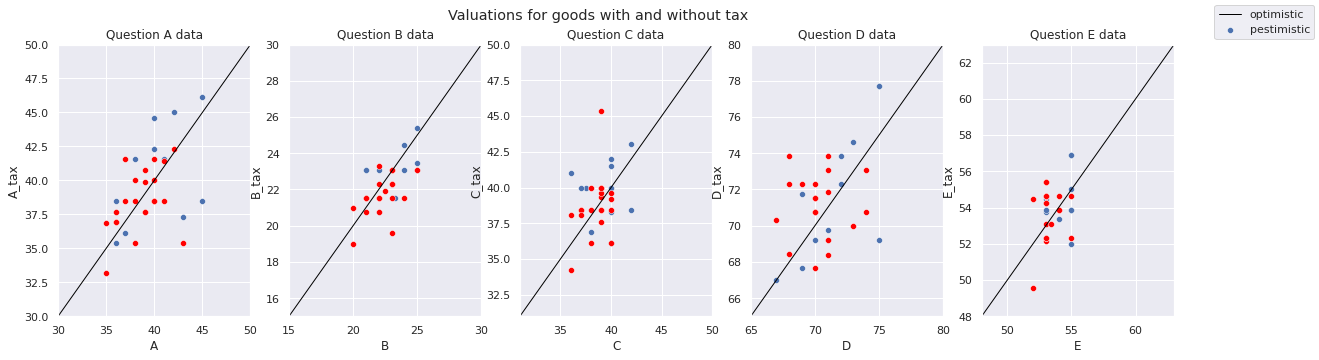

In [159]:
#Set the figure size: 
sns.set(rc={'figure.figsize':(20,5)})

#Divide the figure:
fig, axs = plt.subplots(1,5)
fig.suptitle('Valuations for goods with and without tax')

#Plot each variable with frgn_deposit_share
sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge"] > 0].A, y=(hi_ec_lit[hi_ec_lit["re_ge" ]> 0].A_tax/1.3), ax=axs[0])
sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge" ] <= 0].A, y=(hi_ec_lit[hi_ec_lit["re_ge" ]<= 0].A_tax/1.3), color="red", ax=axs[0])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black", ax=axs[0])
axs[0].set(ylim=(30, 50), xlim=(30,50), title="Question A data" )

sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge"] > 0].B, y=(hi_ec_lit[hi_ec_lit["re_ge" ]> 0].B_tax/1.3), ax=axs[1])
sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge" ] <= 0].B, y=(hi_ec_lit[hi_ec_lit["re_ge" ]<= 0].B_tax/1.3), color="red",  ax=axs[1])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[1])
axs[1].set(ylim=(15, 30), xlim=(15,30), title="Question B data" )

sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge"] > 0].C, y=(hi_ec_lit[hi_ec_lit["re_ge" ]> 0].C_tax/1.3), ax=axs[2])
sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge" ] <= 0].C, y=(hi_ec_lit[hi_ec_lit["re_ge" ]<= 0].C_tax/1.3), color="red",  ax=axs[2])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[2])
axs[2].set(ylim=(31, 50), xlim=(31,50), title="Question C data" )

sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge"] > 0].D, y=(hi_ec_lit[hi_ec_lit["re_ge" ]> 0].D_tax/1.3), ax=axs[3])
sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge" ] <= 0].D, y=(hi_ec_lit[hi_ec_lit["re_ge" ]<= 0].D_tax/1.3), color="red",  ax=axs[3])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[3])
axs[3].set(ylim=(65, 80), xlim=(65,80), title="Question D data" )

sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge"] > 0].E, y=(hi_ec_lit[hi_ec_lit["re_ge" ]> 0].E_tax/1.3),  ax=axs[4])
sns.scatterplot(x=hi_ec_lit[hi_ec_lit["re_ge" ] <= 0].E, y=(hi_ec_lit[hi_ec_lit["re_ge" ]<= 0].E_tax/1.3), color="red",  ax=axs[4])
sns.lineplot([0, 100], [0, 100], linewidth=1,color = "black",  ax=axs[4])
axs[4].set(ylim=(48, 63), xlim=(48,63), title="Question E data" )

fig.legend(["optimistic",   "pestimistic"])
